# Unindo todas as features

In [1]:
# Montando o drive para a leitura de diretórios.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Célula para presets.
!pip install -U imbalanced-learn
!pip install stanza
import stanza
import re
import pandas as pd
stanza.download('pt')
nlp = stanza.Pipeline('pt')
#nlp = stanza.Pipeline('pt', use_gpu=True)
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 13.8 MB/s eta 0:00:00


INFO:stanza:Downloading default packages for language: pt (Portuguese) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor    | Package         |
----------------------------------
| tokenize     | bosque          |
| mwt          | bosque          |
| pos          | bosque_charlm   |
| lemma        | bosque_nocharlm |
| constituency | cintil_charlm   |
| depparse     | bosque_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [3]:

class tweet:
  def __init__ (self,txt):
    self.txt = txt

  def getTxt(self):
    return self.txt

  def f1(self):
    #Verifica a quantidade de pontuações no texto.
    puncts = re.findall('[^\w\s]', self.txt.lower())
    return len(puncts)

  def f2(self):
    #Verifica a quantidade de expressões “lol” “ah”, “eh” e “hi” no texto.
    laught1 = re.findall(" lol | ah | eh | hi ", self.txt.lower())
    return len(laught1)

  def f3(self):
    #Verifica a quantidade de risadas no texto.
    laught2 = re.findall('(kk)+|(ha)+|(rs)+|(ks)+|(he)+|(hua)+|(hau)+|(hue)+', self.txt.lower())
    return len(laught2)

  def f4(self):
    #Verifica a quantidade de emoticons específicos no texto.
    smiley = re.findall(' :-\) | ;-\) | :p ', self.txt.lower())
    return len(smiley)

  def f5(self):
    #Verifica a quantidade de "só que" no texto
    expre1 = re.findall(' só que ', self.txt.lower())
    return len(expre1)

  def f6(self):
    #Verifica a quantidade de "só que não" no texto
    expre2 = re.findall(' só que não ', self.txt.lower())
    return len(expre2)

  def f7(self):
    #Verifica a quantidade de "sim" no texto
    expre3 = re.findall(' sim ', self.txt.lower())
    return len(expre3)

  def f8(self):
    #Verifica a quantidade de "seria" no texto
    expre4 = re.findall(' seria ', self.txt.lower())
    return len(expre4)

  def f9(self):
    #Verifica a quantidade de "na boa" no texto
    expre5 = re.findall(' na boa ', self.txt.lower())
    return len(expre5)

  def f10(self):
    #Verifica a quanditade de expressões de medo no texto
    fear = re.findall(' medo | #medo | medo! ',self.txt.lower())
    return len(fear)

  def f11(self):
    #Verifica a quantidade de #ironia, #sarcasmo, #joking, #kidding
    hashtag = re.findall(' #ironia | #sarcasmo | #joking | #kidding ', self.txt.lower())
    return len(hashtag)

  def f12(self, doc):
    #Verifica se um texto tem Adjetivo seguido de outro adjetivo ou advérbio seguido de outro advérbio
    # doc = nlp(self.txt)
    cont = 0
    pos_list = [word.pos for word in doc.sentences[0].words]
    for i in range(1, len(pos_list)-1):
      if (pos_list[i] == 'ADJ' and (pos_list[i-1] == 'ADJ' or pos_list[i+1] == 'ADJ')) or \
         (pos_list[i] == 'ADV' and (pos_list[i-1] == 'ADV' or pos_list[i+1] == 'ADV')):
          cont += 1
    return cont

  def f13(self, doc):
    #Verifica se o texto tem "tão" + ADJ ou "tão" + ADV
    # doc = nlp(self.txt)
    cont = 0
    pos_list = [word.pos for word in doc.sentences[0].words]
    for i in range(1, len(pos_list)-1):
      if (pos_list[i] == 'ADV' and pos_list[i-1] == 'ADV' and doc.sentences[0].words[i-1].text.lower() == 'tão') or \
         (pos_list[i] == 'ADJ' and pos_list[i-1] == 'ADV' and doc.sentences[0].words[i-1].text.lower() == 'tão'):
          cont += 1
    return cont

In [4]:
#Lendo o corpus de treino e extraindo as features de cada tweet.
trainCorpus = pd.read_csv('/content/drive/MyDrive/TCC/Pro-agrupar/Corpus/training_tweets.csv', sep='\t')
trainMatrix = []
for i in trainCorpus['text']:
  t = tweet(i)
  doc = nlp(i)
  # print(t.txt)
  # WW2Q\AA3WWW3
  result = [t.f1(), t.f2(), t.f3(), t.f4(), t.f5(), t.f6(), t.f7(), t.f8(), t.f9(), t.f10(), t.f11(),t.f12(doc),t.f13(doc)]
  trainMatrix.append(result)

In [5]:
#Lendo o corpus de teste e extraindo as features de cada tweet.
testCorpus = pd.read_csv('/content/drive/MyDrive/TCC/Pro-agrupar/Corpus/test_tweets_com_rotulo.csv', sep='\t')
testMatrix = []
for i in testCorpus['text']:
    t = tweet(i)
    doc = nlp(i)
    result = [t.f1(), t.f2(), t.f3(), t.f4(), t.f5(), t.f6(), t.f7(), t.f8(), t.f9(), t.f10(), t.f11(),t.f12(doc),t.f13(doc)]
    testMatrix.append(result)

In [6]:
#Criando as variáveis de treino e teste que serão usadas nos algoritmos de AM.
X_train = trainMatrix
y_train = trainCorpus['prediction']
X_test = testMatrix
y_test = testCorpus['label']

Corpus de treino


1    12736
0     2476
Name: prediction, dtype: int64

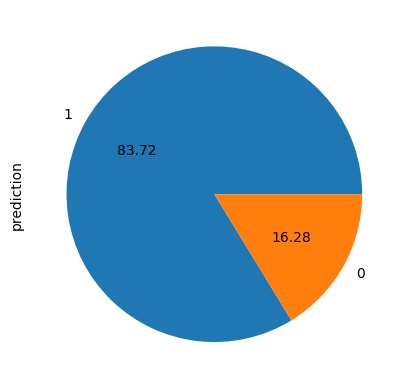

In [7]:
print('Corpus de treino')
y_train.value_counts().plot.pie(autopct='%.2f');
y_train.value_counts()

Corpus de teste


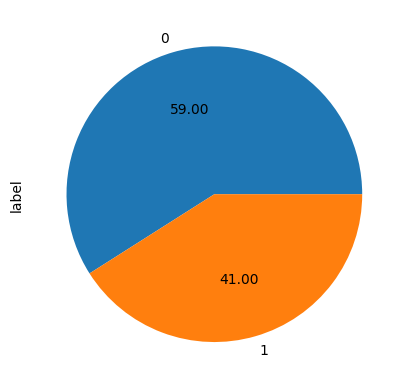

In [8]:
print('Corpus de teste')
y_test.value_counts().plot.pie(autopct='%.2f');

## Ajustando a base de dados

In [9]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler
random_under_sampler = RandomUnderSampler(random_state=42)
X_train_under,y_train_under = random_under_sampler.fit_resample(X_train, y_train)

In [10]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
random_over_sampler = RandomOverSampler(random_state=42)
X_train_over,y_train_over = random_over_sampler.fit_resample(X_train,y_train)

## Essembles

### Gradient boosting

#### Gradient Boosting na base sem alteração

In [11]:
from sklearn.ensemble import HistGradientBoostingClassifier
grad_clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
grad_predict = grad_clf.predict(X_test)
print(f'Ballanced accuracy of Gradient Boosting: {balanced_accuracy_score(y_test, grad_predict)}')
print(classification_report(y_test, grad_predict))

Ballanced accuracy of Gradient Boosting: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.41      1.00      0.58       123

    accuracy                           0.41       300
   macro avg       0.20      0.50      0.29       300
weighted avg       0.17      0.41      0.24       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Gradient Boosting na base diminuida

In [19]:
grad_clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train_under, y_train_under)
grad_predict = grad_clf.predict(X_test)
print(f'Ballanced accuracy of Gradient Boosting undersampled: {balanced_accuracy_score(y_test, grad_predict)}')
print(classification_report(y_test, grad_predict))

Ballanced accuracy of Gradient Boosting undersampled: 0.5414082954388866
              precision    recall  f1-score   support

           0       0.69      0.24      0.35       177
           1       0.44      0.85      0.57       123

    accuracy                           0.49       300
   macro avg       0.56      0.54      0.46       300
weighted avg       0.58      0.49      0.44       300



#### Gradient Boosting na base aumentada

In [13]:
grad_clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train_over, y_train_over)
grad_predict = grad_clf.predict(X_test)
print(f'Ballanced accuracy of Gradient Boosting oversampled: {balanced_accuracy_score(y_test, grad_predict)}')
print(classification_report(y_test, grad_predict))

Ballanced accuracy of Gradient Boosting oversampled: 0.5523632354967618
              precision    recall  f1-score   support

           0       0.72      0.24      0.36       177
           1       0.44      0.86      0.58       123

    accuracy                           0.50       300
   macro avg       0.58      0.55      0.47       300
weighted avg       0.60      0.50      0.45       300



### Random forests

#### Random Forest na base sem alteração

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
rf_predict = rf_clf.predict(X_test)
print(f'Ballanced accuracy of Random Forest: {balanced_accuracy_score(y_test, rf_predict)}')
print(classification_report(y_test, rf_predict))

Ballanced accuracy of Random Forest: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.41      1.00      0.58       123

    accuracy                           0.41       300
   macro avg       0.20      0.50      0.29       300
weighted avg       0.17      0.41      0.24       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest na base diminuida

In [15]:
rf_clf = RandomForestClassifier(n_estimators=10).fit(X_train_under,y_train_under)
rf_predict = rf_clf.predict(X_test)
print(f'Ballanced accuracy of Random Forest undersampled: {balanced_accuracy_score(y_test, rf_predict)}')
print(classification_report(y_test, rf_predict))

Ballanced accuracy of Random Forest undersampled: 0.5504340636626706
              precision    recall  f1-score   support

           0       0.73      0.21      0.33       177
           1       0.44      0.89      0.59       123

    accuracy                           0.49       300
   macro avg       0.59      0.55      0.46       300
weighted avg       0.61      0.49      0.44       300



#### Random Forest na base aumentada

In [23]:
rf_clf = RandomForestClassifier(n_estimators=10).fit(X_train_over,y_train_over)
rf_predict = rf_clf.predict(X_test)
print(f'Ballanced accuracy of Random Forest oversampled: {balanced_accuracy_score(y_test, rf_predict)}')
print(classification_report(y_test, rf_predict))

Ballanced accuracy of Random Forest oversampled: 0.5536034173901061
              precision    recall  f1-score   support

           0       0.72      0.24      0.36       177
           1       0.44      0.87      0.59       123

    accuracy                           0.50       300
   macro avg       0.58      0.55      0.47       300
weighted avg       0.61      0.50      0.45       300



### Bagging

#### Bagging na base sem alteração


In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
ba_clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5).fit(X_train,y_train)
ba_predict = ba_clf.predict(X_test)
print(f'Ballanced accuracy of Bagging: {balanced_accuracy_score(y_test, ba_predict)}')
print(classification_report(y_test, ba_predict))

Ballanced accuracy of Bagging: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.41      1.00      0.58       123

    accuracy                           0.41       300
   macro avg       0.20      0.50      0.29       300
weighted avg       0.17      0.41      0.24       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Bagging na base diminuida

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
ba_clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5).fit(X_train_under,y_train_under)
ba_predict = ba_clf.predict(X_test)
print(f'Ballanced accuracy of Bagging undersampled: {balanced_accuracy_score(y_test, ba_predict)}')
print(classification_report(y_test, ba_predict))

Ballanced accuracy of Bagging undersampled: 0.5520187405263883
              precision    recall  f1-score   support

           0       0.73      0.23      0.34       177
           1       0.44      0.88      0.59       123

    accuracy                           0.49       300
   macro avg       0.58      0.55      0.47       300
weighted avg       0.61      0.49      0.44       300



#### Bagging na base aumentada

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
ba_clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5).fit(X_train_over,y_train_over)
ba_predict = ba_clf.predict(X_test)
print(f'Ballanced accuracy of Bagging oversampled: {balanced_accuracy_score(y_test, ba_predict)}')
print(classification_report(y_test, ba_predict))

Ballanced accuracy of Bagging oversampled: 0.5945983188645446
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       177
           1       0.50      0.60      0.55       123

    accuracy                           0.59       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.61      0.59      0.60       300



### Voting

#### Voting na base sem alteração

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = SVC(kernel='linear', C=1)
clf4 = RandomForestClassifier(n_estimators=50, random_state=1)
clf5 = DecisionTreeClassifier(random_state=1)

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('svm', clf3), ('rf', clf4), ('dt', clf5)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf],
                      ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Decision Tree', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='balanced_accuracy', cv=5)
    print("BACC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


BACC: 0.50 (+/- 0.00) [Logistic Regression]
BACC: 0.53 (+/- 0.03) [KNN]
BACC: 0.50 (+/- 0.00) [SVM]
BACC: 0.50 (+/- 0.00) [Random Forest]
BACC: 0.50 (+/- 0.00) [Decision Tree]
BACC: 0.50 (+/- 0.00) [Ensemble]


In [37]:
eclf = eclf.fit(X_train,y_train)
eclf_predict = eclf.predict(X_test)
print(f'Ballanced accuracy of Voting: {balanced_accuracy_score(y_test, eclf_predict)}')
print(classification_report(y_test, eclf_predict))

Ballanced accuracy of Voting: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.41      1.00      0.58       123

    accuracy                           0.41       300
   macro avg       0.20      0.50      0.29       300
weighted avg       0.17      0.41      0.24       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Voting na base diminuida

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = SVC(kernel='linear', C=1)
clf4 = RandomForestClassifier(n_estimators=50, random_state=1)
clf5 = DecisionTreeClassifier(random_state=1)

eclf_under = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('svm', clf3), ('rf', clf4), ('dt', clf5)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf],
                      ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Decision Tree', 'Voting']):
    scores = cross_val_score(clf, X_train_under, y_train_under, scoring='balanced_accuracy', cv=5)
    print("BACC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

BACC: 0.60 (+/- 0.02) [Logistic Regression]
BACC: 0.53 (+/- 0.00) [KNN]
BACC: 0.59 (+/- 0.02) [SVM]
BACC: 0.60 (+/- 0.02) [Random Forest]
BACC: 0.60 (+/- 0.02) [Decision Tree]
BACC: 0.60 (+/- 0.02) [Voting]


In [42]:
eclf_under = eclf_under.fit(X_train_under,y_train_under)
eclf_under_predict = eclf_under.predict(X_test)
print(f'Ballanced accuracy of Voting undersampled: {balanced_accuracy_score(y_test, eclf_under_predict)}')
print(classification_report(y_test, eclf_under_predict))

Ballanced accuracy of Voting: 0.5717927518258233
              precision    recall  f1-score   support

           0       0.76      0.27      0.39       177
           1       0.45      0.88      0.60       123

    accuracy                           0.52       300
   macro avg       0.61      0.57      0.50       300
weighted avg       0.63      0.52      0.48       300



#### Voting na base aumentada

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = SVC(kernel='linear', C=1)
clf4 = RandomForestClassifier(n_estimators=50, random_state=1)
clf5 = DecisionTreeClassifier(random_state=1)

eclf_over = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('svm', clf3), ('rf', clf4), ('dt', clf5)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf],
                      ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Decision Tree', 'Voting']):
    scores = cross_val_score(clf, X_train_over, y_train_over, scoring='balanced_accuracy', cv=5)
    print("BACC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

BACC: 0.60 (+/- 0.00) [Logistic Regression]
BACC: 0.51 (+/- 0.01) [KNN]
BACC: 0.59 (+/- 0.00) [SVM]
BACC: 0.61 (+/- 0.00) [Random Forest]
BACC: 0.61 (+/- 0.00) [Decision Tree]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

BACC: 0.61 (+/- 0.01) [Voting]


In [46]:
eclf_over = eclf_over.fit(X_train_over,y_train_over)
eclf_over_predict = eclf_over.predict(X_test)
print(f'Ballanced accuracy of Voting oversampled: {balanced_accuracy_score(y_test, eclf_over_predict)}')
print(classification_report(y_test, eclf_over_predict))

Ballanced accuracy of Voting oversampled: 0.5465757199944881
              precision    recall  f1-score   support

           0       0.78      0.16      0.26       177
           1       0.44      0.93      0.59       123

    accuracy                           0.48       300
   macro avg       0.61      0.55      0.43       300
weighted avg       0.64      0.48      0.40       300



### Stacking

#### Montando o stacking

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
    ('lg', LogisticRegression(random_state=1)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('svc', SVC(kernel='linear', C=1)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=1)),
    ('dt', DecisionTreeClassifier(random_state=1))

]
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

#### Stacking na base sem alteração

In [52]:
stacking_clf = stacking_clf.fit(X_train, y_train)
stacking_clf_predict = stacking_clf.predict(X_test)
print(f'Ballanced accuracy of Stacking: {balanced_accuracy_score(y_test, stacking_clf_predict)}')
print(classification_report(y_test, stacking_clf_predict))

Ballanced accuracy of Voting oversampled: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.41      1.00      0.58       123

    accuracy                           0.41       300
   macro avg       0.20      0.50      0.29       300
weighted avg       0.17      0.41      0.24       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Stacking diminuída

In [54]:
stacking_clf = stacking_clf.fit(X_train_under, y_train_under)
stacking_clf_under_predict = stacking_clf.predict(X_test)
print(f'Ballanced accuracy of Stacking undersampled: {balanced_accuracy_score(y_test, stacking_clf_under_predict)}')
print(classification_report(y_test, stacking_clf_under_predict))

Ballanced accuracy of Voting oversampled: 0.558908639933857
              precision    recall  f1-score   support

           0       0.75      0.23      0.35       177
           1       0.44      0.89      0.59       123

    accuracy                           0.50       300
   macro avg       0.60      0.56      0.47       300
weighted avg       0.62      0.50      0.45       300



#### Stacking na base aumentada

In [56]:
stacking_clf = stacking_clf.fit(X_train_over, y_train_over)
stacking_clf_over_predict = stacking_clf.predict(X_test)
print(f'Ballanced accuracy of Voting oversampled: {balanced_accuracy_score(y_test, stacking_clf_over_predict)}')
print(classification_report(y_test, stacking_clf_over_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ballanced accuracy of Voting oversampled: 0.5435441642552019
              precision    recall  f1-score   support

           0       0.71      0.21      0.32       177
           1       0.44      0.88      0.58       123

    accuracy                           0.48       300
   macro avg       0.57      0.54      0.45       300
weighted avg       0.60      0.48      0.43       300

